<a href="https://colab.research.google.com/github/Vee-veahn/hello-world/blob/master/Copy_of_ifeoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


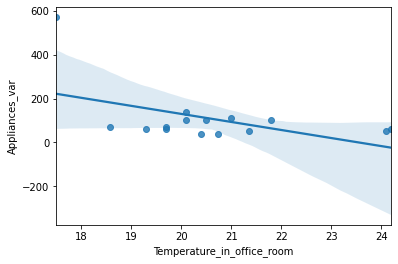

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv ('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
#rename coumns
columns_title = {"date" : "date_var", "Appliances" : "Appliances_var", "lights" : "lights_var", "T1" : "Temperature_in_kitchen_area",
                 "RH_1" : "Humidity_in_kitchen_area", "T2" : "Temperature_in_living_room_area", "RH_2" : "Humidity_in_living_room_area", 
                 "T3" : "Temperature_in_laundry_room_area", "RH_3" : "Humidity_in_laundry_room_area", "T4" : "Temperature_in_office_room", 
                 "RH_4" : "Humidity_in_office_room", "T5" : "Temperature_in_bathroom", "RH_5" : "Humidity_in_bathroom", 
                 "T6" : "Temperature_outside_the_building_(north_side)", "RH_6" : "Humidity_outside_the_building_(north_side)", 
                 "T7" : "Temperature_in_ironing_room", "RH_7" : "Humidity_in_ironing_room", "T8" : "Temperature_in_teenager_room_2", 
                 "RH_8" : "Humidity_in_teenager_room_2", "T9" : "Temperature_in_parents_room", "RH_9" : "Humidity_in_parents_room", "T_out" : "Temperature_outside", 
                 "Pressure" : "Pressure_mm_Hg", "RH_out" : "Humidity_outside", "Wind_speed" : "Wind_speed_m/s", "Visibility" : "Visibility_km", 
                 "Tdewpoint" : "Tdewpoint_Â_°C", "rv1" : "Random_variable_1", "rv2" : "Random_variable_2"}


df = df.rename(columns=columns_title)
#select a sample of the dataset
simple_linear_reg_df = df [["Temperature_in_office_room", "Appliances_var"]].sample(15, random_state=3)
#regression plot
sns.regplot(x="Temperature_in_office_room", y="Appliances_var",
            data=simple_linear_reg_df)



In [ ]:
features_df = df.drop(columns=["date_var", "lights_var"], axis=1, inplace=True)

KeyError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
appliances_target = normalised_df["Appliances_var"]

In [ ]:
primary_df = normalised_df(column=["Temperature_in_kitchen_area", "Temperature_in_living_room_area"], axis=1, inplace=True)
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(primary_df, appliances_target, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)



TypeError: ignored